In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
    

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(["User ID"], axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=3, )

In [9]:
from sklearn.preprocessing import StandardScaler
func = StandardScaler()
func.fit(x_train)
x_train_std = func.transform(x_train)
x_test_std = func.transform(x_test)

**Splitting the dataset into the Training set and Test set**

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)



(300, 2) (100, 2) (300,) (100,)


**Feature Scaling**

**Fitting K-NN to the Training set**

In [13]:
n=[1,2,3,4,5,6,7,10,20,30]
acc_res=[]
for num in n:
    model = KNeighborsClassifier(n_neighbors=num).fit(x_train_std, y_train)
    acc_res.append(accuracy_score(y_test, model.predict(x_test_std)))

**Predicting the Test set results**

In [15]:
acc_res
np.array(acc_res).argmax()
# k=5 gives the best result

4

In [16]:
final_model = KNeighborsClassifier(n_neighbors=5).fit(x_train_std, y_train)
y_pred = final_model.predict(x_test_std)

**Making the Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

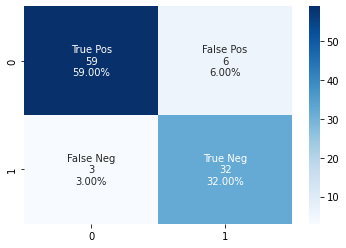

In [20]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [21]:

accuracy_score(y_test,y_pred)

0.91

## Conclusion 
-> The final Accuracy is arrived at 91%, thus the model is performing good. 